In [63]:
import numpy as np
import plotly.graph_objects as go
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from IPython import display
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torchmetrics

In [65]:
sns.set()
display.set_matplotlib_formats("svg")

In [66]:
data = pd.read_csv("dataset/iris.csv")

In [67]:
data

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

In [68]:
data["Name"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
def map_func(name):
    if name.endswith("setosa"):
        return 0
    if name.endswith("versicolor"):
        return 1
    return 2

In [70]:
data["Lable"] = data["Name"].map(map_func)

In [71]:
data

SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Lable
0            5.1         3.5          1.4         0.2     Iris-setosa      0
1            4.9         3.0          1.4         0.2     Iris-setosa      0
2            4.7         3.2          1.3         0.2     Iris-setosa      0
3            4.6         3.1          1.5         0.2     Iris-setosa      0
4            5.0         3.6          1.4         0.2     Iris-setosa      0
..           ...         ...          ...         ...             ...    ...
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2

[150 rows x 6 columns]

In [72]:
X = data.values[:, :2]
Y = data.values[:, -1]
P_length = data.values[:, 2]
P_width = data.values[:, 3]

In [73]:
X = X.astype(np.float)

In [74]:
X.dtype

dtype('float64')

In [75]:
Y = Y.astype(np.int32)
P_length = P_length.astype(np.float)
P_width = P_width.astype(np.float)

In [80]:
fig1 = go.Scatter3d(x=data["SepalLength"], y=data["SepalWidth"], 
                   z=data["PetalLength"], name="Z = PetalLength",
                   mode="markers", marker={"size": 3, "color": "green"})
fig2 = go.Scatter3d(x=data["SepalLength"], y=data["SepalWidth"], 
                   z=data["PetalWidth"], name="Z = PetalWidth",
                   mode="markers", marker={"size": 3, "color": "red"})
fig = go.Figure([fig1, fig2])
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [79]:
fig.write_image("scatter_3d-01.svg")

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, P_width, test_size=0.1, 
                                                    random_state=100)

In [16]:
X_train.shape, Y_train.shape

((135, 2), (135,))

In [17]:
model = linear_model.LinearRegression()
model = model.fit(X_train, Y_train)

In [18]:
model.coef_

array([ 0.71831846, -0.46811905])

In [19]:
model.intercept_

-1.567681810341847

In [20]:
print("MSE = {}".format(np.mean((model.predict(X_test) - Y_test) ** 2)))

MSE = 0.10471601985180973


In [21]:
x = np.linspace(0, 10, 100).reshape(1, 100)
y = np.linspace(0, 10, 100).reshape(1, 100)
xx, yy = np.meshgrid(x, y)

In [22]:
zz = 0.72569303 * xx - 0.4819131 * yy + model.intercept_

In [23]:
xx

array([[ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       ...,
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ],
       [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
        10.       ]])

In [24]:
zz.shape

(100, 100)

In [25]:
fig1 = go.Scatter3d(x=data["SepalLength"], y=data["SepalWidth"], 
                   z=data["PetalWidth"],
                   mode="markers", marker={"size": 2, "color": "green"})
fig2 = go.Surface(x=xx, y=yy, z=zz)
fig = go.Figure(data=[fig1, fig2])
fig.show()

# Pytorch 实现线性回归

In [26]:
class MyDataset(Dataset):
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def __len__(self):
        
        return len(self.X)
    
    def __getitem__(self, idx):
        
        return self.X[idx], self.Y[idx]

In [27]:
trainset = MyDataset(X_train, Y_train)
data_loader = DataLoader(trainset, batch_size=135, shuffle=True, drop_last=False)

In [28]:
test = iter(data_loader)

In [29]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        
        return self.linear(x).squeeze(1)


In [30]:
model = Model().to("cuda:1")
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [31]:
losses = []

In [32]:
Epoch = 1000

In [33]:
model.train(True)
for i in range(Epoch):
    temp_loss = []
    for d, l in data_loader:
        d = d.float().to("cuda:1")
        l = l.float().to("cuda:1")
        out = model(d)
        loss = criterion(out, l)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        temp_loss.append(loss.item())
    losses.append(np.mean(temp_loss))
#     if i % 200:
#         ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
#         ax.set_xlabel("Epoch")
#         ax.set_ylabel("Loss")
#         plt.pause(0.0001)
#         display.clear_output(wait=True)

Text(0.5, 1.0, 'Loss Curve')

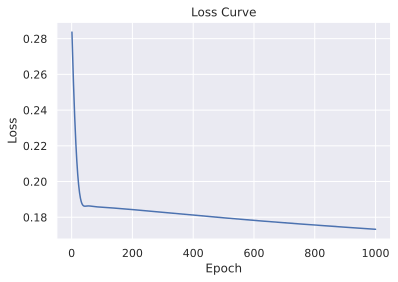

In [34]:
ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss Curve")

In [35]:
X_test = torch.from_numpy(X_test).float()
Y_test = torch.from_numpy(Y_test).float()

In [36]:
model = model.train(False)
with torch.no_grad():
    out = model(X_test.to("cuda:1"))
    loss = criterion(out, Y_test.to("cuda:1"))
    print("Loss = {}".format(loss.item()))

Loss = 0.12760312855243683


In [37]:
for parm in model.linear.parameters():
    print(parm)

Parameter containing:
tensor([[ 0.5909, -0.6912]], device='cuda:1', requires_grad=True)
Parameter containing:
tensor([-0.1354], device='cuda:1', requires_grad=True)


In [38]:
L_zz = 0.5791 * xx - 0.4596 * yy - 0.7723
fig1 = go.Scatter3d(x=data["SepalLength"], y=data["SepalWidth"], 
                   z=data["PetalWidth"],
                   mode="markers", marker={"size": 2, "color": "green"})
fig2 = go.Surface(x=xx, y=yy, z=zz, name="Linear Regression")
fig3 = go.Surface(x=xx, y=yy, z=L_zz, name="Pytorch")
fig = go.Figure(data=[fig1, fig2, fig3])
fig.show()

# Pytorch 分类

In [39]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.norm = nn.BatchNorm1d(4)
        self.linear = nn.Linear(4, 3)
        self.softmax = nn.Softmax(dim=-1)
        
    def forward(self, x):
        x = self.norm(x)
        x = self.linear(x)
        x = self.softmax(x)
        return x

In [40]:
X = data.values[:, :4].astype(np.float)
Y = data.values[:, -1].astype(np.float)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, 
                                                    random_state=100)

In [42]:
trainset = MyDataset(X_train, Y_train)
data_loader = DataLoader(trainset, batch_size=135, shuffle=True, drop_last=False)

In [43]:
model = Classifier().to("cuda:1")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [44]:
losses = []

In [45]:
Epoch = 2000

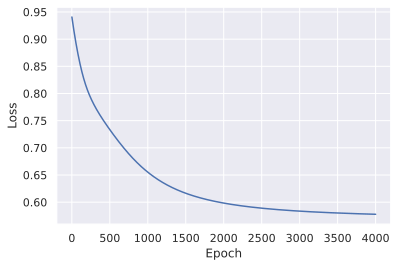

In [49]:
model.train(True)
for i in range(Epoch):
    temp_loss = []
    for d, l in data_loader:
        d = d.float().to("cuda:1")
        l = l.long().to("cuda:1")
        out = model(d)
        loss = criterion(out, l)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        temp_loss.append(loss.item())
    losses.append(np.mean(temp_loss))
    if (i + 1) % 100 == 0:
        ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        plt.pause(0.0001)
        display.clear_output(wait=True)

In [47]:
X_test = torch.from_numpy(X_test).float()
Y_test = torch.from_numpy(Y_test).long()

In [50]:
model = model.train(False)
accuracy = torchmetrics.Accuracy()
with torch.no_grad():
    out = model(X_test.to("cuda:1"))
    loss = criterion(out, Y_test.to("cuda:1"))
    acc = accuracy(out, Y_test.to("cuda:1"))
    print("Loss = {} acc = {}".format(loss.item(), acc))

Loss = 0.5580518245697021 acc = 1.0


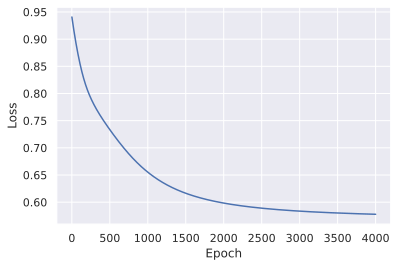

In [53]:
ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.savefig(fname="demo", format="svg")